In [3]:
!pip install psycopg2

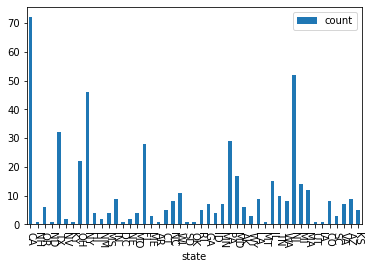

In [5]:
from decouple import config
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

connection = psycopg2.connect(
    database='postgres',
    user='postgres',
    password=config("DBPASSWORD"),
    host='127.0.0.1',
    port='5432'
)
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cursor = connection.cursor()
cursor.execute(
    """
    SELECT 
    first_name, last_name, address, city, 
    county, state, zip, phone1, phone2 FROM people.users
    """
    )
pf = pd.DataFrame(cursor.fetchall(), 
columns=["first_name", "last_name", "address", "city", "county", "state", "zip", "phone1", "phone2"])
cursor.execute(
    "SELECT state, count(first_name) FROM people.users group by state"
    )
users = pd.DataFrame(cursor.fetchall(), columns=['state', 'count'])

users.plot.bar(x='state', y='count',rot=-90)
plt.show()

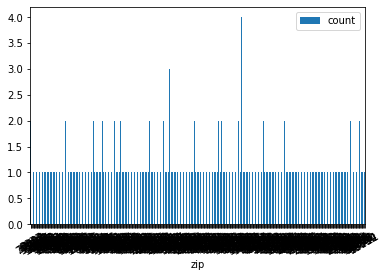

In [16]:
cursor.execute(
    "SELECT zip, count(first_name) FROM people.users group by zip"
    )
users = pd.DataFrame(cursor.fetchall(), columns=['zip', 'count'])

users.plot.bar(x='zip', y='count',rot=30)
plt.show()